### 1. Import claims_data.csv and cust_data.csv which is provided to you and 
### combine the two datasets appropriately to create a 360-degree view of 
### the data. Use the same for the subsequent questions.


In [1]:
#import the packages
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#import the datasets
claim=pd.read_csv('claims.csv')
cust=pd.read_csv('cust_demographics.csv')

In [3]:
claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
#combining the data
data=pd.merge(claim,cust,left_on='customer_id',right_on='CUST_ID',how='inner')

In [6]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


### 2. Perform a data audit for the datatypes and find out if there are any 
### mismatch within the current datatypes of the columns and their 
### business significance.

In [7]:
data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [8]:
#changing data types
data['claim_date']=pd.to_datetime(data['claim_date'])
data['claim_amount']=data['claim_amount'].apply(lambda x:float(str(x).replace("$","")))
data['DateOfBirth']=pd.to_datetime(data['DateOfBirth'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_3176\839947432.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateOfBirth']=pd.to_datetime(data['DateOfBirth'])


In [9]:
data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

### 3. Convert the column claim_amount to numeric. Use the appropriate 
### modules/attributes to remove the $ sign.


In [10]:
data['claim_amount']

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

### 4. Of all the injury claims, some of them have gone unreported with the 
### police. Create an alert flag (1,0) for all such claims.

In [11]:
data['police_report'].value_counts()

police_report
No         621
Unknown    296
Yes        168
Name: count, dtype: int64

In [12]:
data['claim_type'].value_counts()

claim_type
Material only          653
Material and injury    237
Injury only            195
Name: count, dtype: int64

In [13]:
data['unreported_claims']=0
data.loc[(data.claim_type=='Injury only') &(data.police_report=='No'),'unreported_claims']=1

In [14]:
data[(data.claim_type=='Injury only') &(data.police_report=='No')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1
21,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,63916778,Male,2066-09-07,IL,146-157-4572,Platinum,1
22,29205389,17004138,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,17004138,Female,2065-08-13,WA,436-354-4682,Silver,1
33,18210740,80379865,Natural causes,2018-02-09,Auto,No,Injury only,18580.0,NaN,No,80379865,Male,2069-02-27,NM,427-513-8479,Gold,1
41,13167216,27205554,Driver error,2018-05-14,Auto,No,Injury only,16910.0,1.0,No,27205554,Male,1976-04-12,RI,521-912-8139,Silver,1
47,3673097,54642094,Driver error,2017-04-12,Auto,No,Injury only,19960.0,1.0,No,54642094,Male,1995-08-10,NY,963-813-1973,Silver,1
48,58245818,47091036,Driver error,2018-07-27,Home,No,Injury only,27230.0,1.0,No,47091036,Male,1986-10-22,SD,247-436-8713,Gold,1
97,76552623,56590042,Other causes,2017-11-06,Auto,No,Injury only,31498.5,4.0,Yes,56590042,Male,2067-01-12,AL,254-651-9452,Silver,1
103,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,NaN,1.0,No,92752865,Male,1986-01-30,AK,143-219-5498,Silver,1
113,67043170,94448966,Other driver error,2018-10-16,Auto,No,Injury only,23760.0,1.0,No,94448966,Female,1984-06-20,MD,845-768-2513,Gold,1


### 5. One customer can claim for insurance more than once and in each claim,
### multiple categories of claims can be involved. However, customer ID 
### should remain unique. 
### Retain the most recent observation and delete any duplicated records in
### the data based on the customer ID column.

In [15]:
data['customer_id'].nunique()

1078

In [16]:
data['customer_id'].drop_duplicates()

0       21868593
1       75740424
2       30308357
4       47830476
6       19269962
          ...   
1080    79539873
1081    42364152
1082    19888166
1083    11256802
1084    61575264
Name: customer_id, Length: 1078, dtype: int64

In [17]:
data['claim_date'].sort_values(ascending=False)

286    2018-10-30
354    2018-10-30
1055   2018-10-30
941    2018-10-30
322    2018-10-30
          ...    
231    2017-01-01
905    2017-01-01
195    2017-01-01
177    2017-01-01
181    2017-01-01
Name: claim_date, Length: 1085, dtype: datetime64[ns]

### 6. Check for missing values and impute the missing values with an 
### appropriate value. (mean for continuous and mode for categorical)


In [18]:
data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
unreported_claims       0
dtype: int64

In [19]:
#replacing missing values
data['claim_amount']=np.where(data['claim_amount'].isna(),data['claim_amount'].mean(),data['claim_amount'])
data['total_policy_claims']=np.where(data['total_policy_claims'].isna(),data['total_policy_claims'].mean(),data['total_policy_claims'])

In [20]:
data.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
unreported_claims      0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the
### customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60


In [21]:
data.DateOfBirth.max()

Timestamp('2073-11-30 00:00:00')

In [22]:
data['DateOfBirth']=data.DateOfBirth.apply(lambda x : x.replace(year=x.year-100) if x.year >2000 else x)

In [23]:
data.DateOfBirth.max()

Timestamp('1999-12-27 00:00:00')

In [24]:
data['age']=dt.datetime.now().year-data['DateOfBirth'].dt.year

In [25]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,45
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0,54
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,40
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,40
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,38


In [26]:
def categorize_age(age):
    if age < 18:
        return "Children"
    elif age <= 30:
        return "Youth"
    elif age <= 60:
        return "Adult"
    else:
        return "Senior"

In [27]:
data['category']=data['age'].apply(categorize_age)

In [28]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,45,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0,54,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,40,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,40,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,38,Adult


### 8. What is the average amount claimed by the customers from various 
### segments?

In [29]:
data.Segment.value_counts()

Segment
Gold        375
Platinum    362
Silver      348
Name: count, dtype: int64

In [30]:
gold=data[data['Segment']=='Gold']

In [31]:
gold['claim_amount'].mean()

12829.63197385621

In [32]:
platinum=data[data['Segment']=='Platinum']

In [33]:
platinum['claim_amount'].mean()

12341.952266818329

In [34]:
silver=data[data['Segment']=='Silver']

In [35]:
silver['claim_amount'].mean()

12208.435570205096

### 9. What is the total claim amount based on incident cause for all the claims
### that have been done at least 20 days prior to 1st of October, 2018.

In [36]:
date=datetime(2018,10,1)-dt.timedelta(days=20)
req_date=data[data['claim_date']<date]
req_date.groupby('incident_cause')['claim_amount'].sum()



incident_cause
Crime                 7.244484e+05
Driver error          3.319952e+06
Natural causes        1.314121e+06
Other causes          3.724985e+06
Other driver error    3.318770e+06
Name: claim_amount, dtype: float64

### 10. How many adults from TX, DE and AK claimed insurance for driver 
### related issues and causes?

In [37]:
adult=data[data['category']=='Adult']
loc=adult[(adult['State'].isin(['TX','DE','AK']))]
driver_issue=loc[(loc['incident_cause'].isin(['Driver error','Other driver error']))]
driver_issue.shape[0]

28

### 11. Draw a pie chart between the aggregated value of claim amount based 
### on gender and segment. Represent the claim amount as a percentage on
### the pie chart.

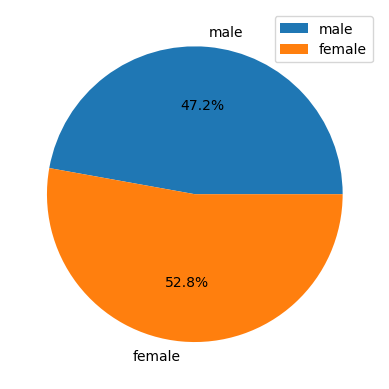

In [38]:
agg_data1 = data.groupby('gender')['claim_amount'].sum()
labels={'male':data[data['gender']=='Male'],'female':data[data['gender']=='Female']}
plt.pie(agg_data1,labels=labels,autopct='%1.1f%%')
plt.legend()

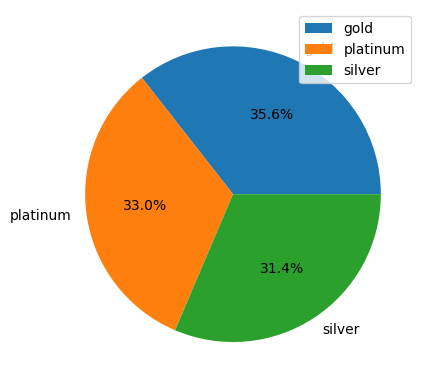

In [39]:
agg_data2 = data.groupby('Segment')['claim_amount'].sum()
labels={'gold':data[data['Segment']=='Gold'],'platinum':data[data['Segment']=='Platinum'],'silver':data[data['Segment']=='Silver']}
plt.pie(agg_data2,labels=labels,autopct='%1.1f%%')
plt.legend()

### 12. Among males and females, which gender had claimed the most for any 
### type of driver related issues? E.g. This metric can be compared using a 
### bar chart

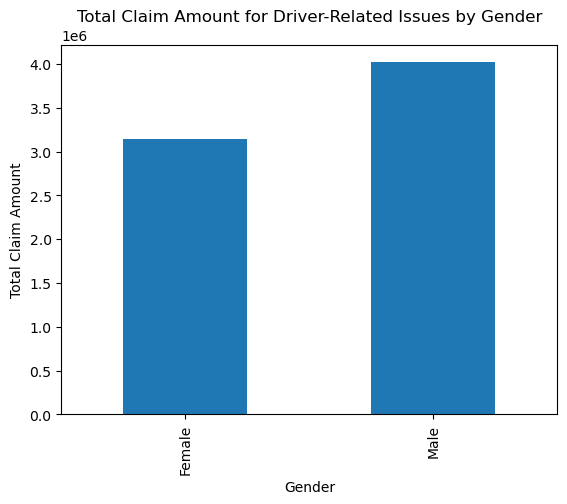

In [40]:
driver_issue=data[(data['incident_cause'].isin(['Driver error','Other driver error']))]
agg_data = driver_issue.groupby('gender')['claim_amount'].sum()
agg_data.plot(kind='bar')
plt.title('Total Claim Amount for Driver-Related Issues by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize 
### it on a bar chart.


<Axes: xlabel='category'>

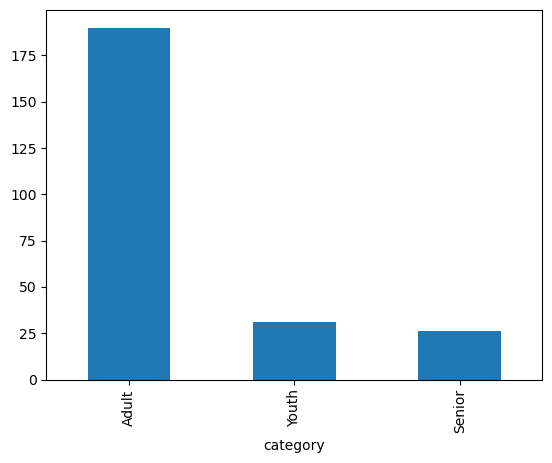

In [41]:
fraud_claim=data[data['fraudulent']=='Yes']
agg_data=fraud_claim['category'].value_counts()
agg_data.plot(kind='bar')

### 14. Visualize the monthly trend of the total amount that has been claimed 
### by the customers. Ensure that on the “month” axis, the month is in a 
### chronological order not alphabetical order.

<Axes: xlabel='Month'>

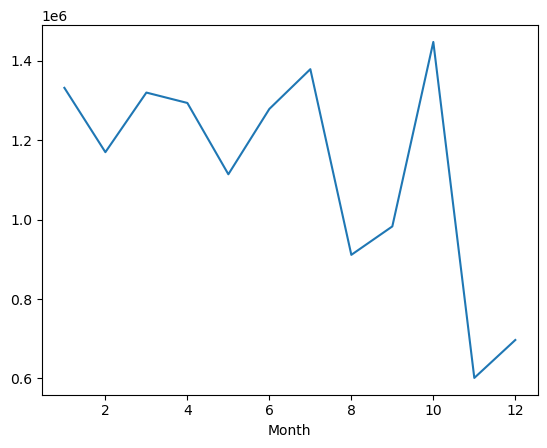

In [42]:
data['Month'] = data['claim_date'].dt.month
monthly_totals = data.groupby('Month')['claim_amount'].sum()
monthly_totals.plot(kind='line')

### 15. What is the average claim amount for gender and age categories and 
### suitably represent the above using a facetted bar chart, one facet that 
### represents fraudulent claims and the other for non-fraudulent claims.

<Axes: >

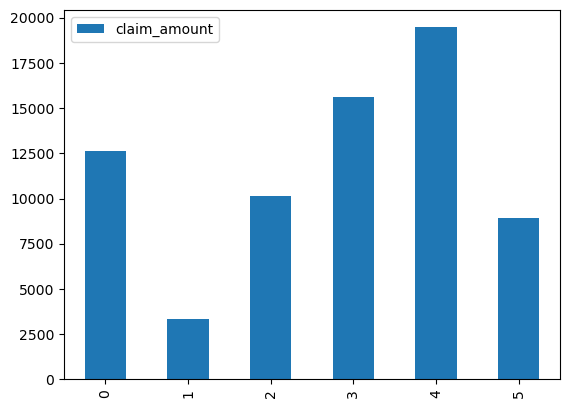

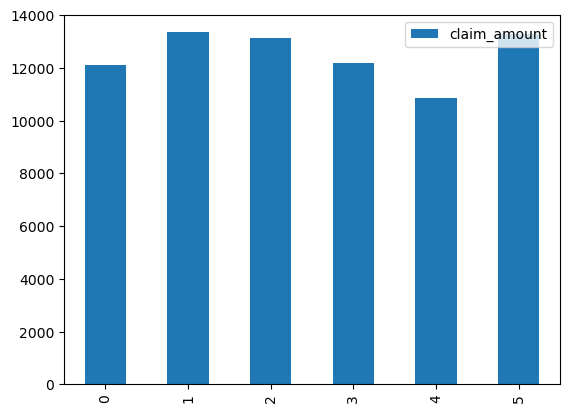

In [43]:
fraud_claim=data[data['fraudulent']=='Yes']
no_fraud_claim=data[data['fraudulent']=='No']
avg_claim_amount_fraud = fraud_claim.groupby(['gender', 'category'])['claim_amount'].mean().reset_index()
avg_claim_amount_non_fraud = no_fraud_claim.groupby(['gender', 'category'])['claim_amount'].mean().reset_index()
avg_claim_amount_fraud.plot(kind='bar')
avg_claim_amount_non_fraud.plot(kind='bar')

### 16. Is there any similarity in the amount claimed by males and females?


### 1.) Define Null Hypothesis (H0):
      #H0 : There is no similarity in the amount claimed by males and females .
             u1=u2
### 2.) Define Alternate Hyothesis (Ha):
      #Ha : There is  similarity in the amount claimed by males and females . 
             u1<>u2
### 3.) Define CI and p-value:
      #CI = 95%
      #p-value=0.05%
### 4.) Perform Test:
      #T-Test

In [44]:
male=data[data['gender']=='Male']
female=data[data['gender']=='Female']
u1=male.claim_amount
u2=female.claim_amount



In [45]:
stats.ttest_ind(u1,u2)

TtestResult(statistic=0.9738138415066818, pvalue=0.33036643165116597, df=1083.0)

### Conclusion:
     # since the new p-value is 0.33>0.05.
    # hence we fail to reject the null hypothesis.

### 17. Is there any relationship between age category and segment?


### 1.) Define Null Hypothesis (H0):
#H0 : There no relationship between age category and segment

### 2.) Define Alternate Hyothesis (Ha):
#Ha : There is any relationship between age category and segment

### 3.) Define CI and p-value:
#CI = 95% #p-value=0.05%

### 4.) Perform Test:
#Chi-square test

In [46]:
tab=pd.crosstab(data.category,data.Segment)

In [47]:
stats.chi2_contingency(tab)

Chi2ContingencyResult(statistic=0.9329931615944429, pvalue=0.9197804277584449, dof=4, expected_freq=array([[279.60829493, 269.91520737, 259.4764977 ],
       [ 35.25345622,  34.03133641,  32.71520737],
       [ 60.13824885,  58.05345622,  55.80829493]]))

### Conclusion:
     # so the new p-value is 0.919>0.05
     # hence we fail to reject the null hypothesis
     

### 18. The current year has shown a significant rise in claim amounts as 
### compared to 2016-17 fiscal average which was $10,000.

### 1.) Define Null Hypothesis (H0):
#H0 : There is no rise in claim amount.

### 2.) Define Alternate Hyothesis (Ha):
#Ha : There is rise in claim amount .

### 3.) Define CI and p-value:
#CI = 95% #p-value=0.05%

### 4.) Perform Test:
#T-Test

In [48]:
u1=data.claim_amount.mean()

In [49]:
u1

12467.681372549021

In [50]:
stats.ttest_1samp(data.claim_amount,u1)

TtestResult(statistic=0.0, pvalue=1.0, df=1084)

### Conclision:
    # since the new p-value is 1>0.05
    # hence we fail to reject null hypothesis

### 19. Is there any difference between age groups and insurance claims?

### 1.) Define Null Hypothesis (H0):
#H0 : There is no difference between age groups and insurance claims.

### 2.) Define Alternate Hyothesis (Ha):
#Ha : There is difference between age groups and insurance claims.

### 3.) Define CI and p-value:
#CI = 95% #p-value=0.05%

### 4.) Perform Test:
#F-Test

In [51]:
adult=data.claim_amount[data['category']=='Adult']
youth=data.claim_amount[data['category']=='Youth']
senior=data.claim_amount[data['category']=='Senior']

In [52]:
stats.f_oneway(adult,youth,senior)

F_onewayResult(statistic=0.5294088044182969, pvalue=0.5891055317629474)

### Conclusion:
    # since the new p-value is 0.589>0.05.
    # hence we fail to reject the null hypothesis.

### 20. Is there any relationship between total number of policy claims and the 
### claimed amount?

### 1.) Define Null Hypothesis (H0):
      #H0 : There is no relationship between total number of policy claims and the
            #claimed amount.
### 2.) Define Alternate Hyothesis (Ha):
      #Ha : there is relationship between total number of policy claims and the
            #claimed amount .
### 3.) Define CI and p-value:
      #CI = 95%
      #p-value=0.05%
### 4.) Perform Test:
      #Pearsonr Coefficient Test

In [53]:
stats.pearsonr(data['total_policy_claims'],data['claim_amount'])

PearsonRResult(statistic=-0.017448562393468953, pvalue=0.5658830110321474)

### Conclusion:
     # Since the pearsonr test score is -0.017 which indicates a weak indirect relation.